<a href="https://colab.research.google.com/github/nurilhaidar/PCVK/blob/main/Week07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>PRAKTIKUM<h2>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [2]:
# Membuat fungsi convokution 2d yang berisi parameter image, kernel, stride, dan padding
def convolution2d(image, kernel, stride, padding):

  # Image akan diperluas menggunakan numpy np.pad dan skala padding (perluasan) sudah ditentukan oleh parameter
  image = np.pad(image, padding, mode='constant', constant_values=0)

  # Menghitung tinggi dan lebar kernel yang akan digunakan
  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  # Menghitung tinggi dan lebar dari citra yang telah dipadding dengan tinggi dan lebar kernel, setelah itu dihitung langkahnya (stride + 1)
  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  # Membuat sebuah wadah untuk menamping hasil citra yang telah di konvolusi
  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # Proses konvolusi pada citra
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)

  # Mengembalikan hasil konvolusi
  return new_image

In [3]:
# Mengambil gambar yang akan diproses dari google drive
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
# Merubah gambar menjadi grayscale
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

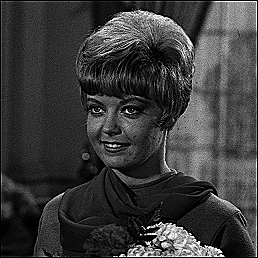

In [4]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
cv2_imshow(convolution2d(img_gray, sharpen, 1, 2))

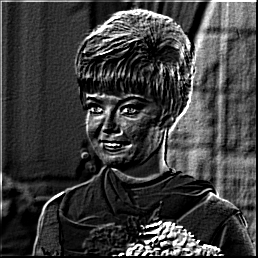

In [5]:
embos = np.array([[-2, -1, 0],
                  [-1, 1, 1],
                  [0, 1, 2]])
cv2_imshow(convolution2d(img_gray, embos, 1, 2))

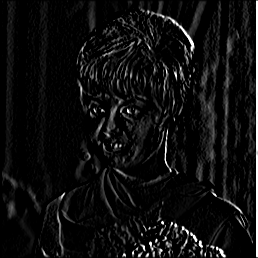

In [6]:
left_sobel = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
cv2_imshow(convolution2d(img_gray, left_sobel, 1, 2))

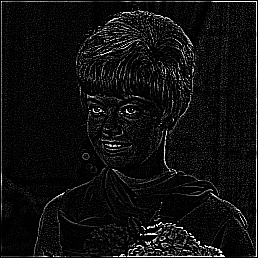

In [7]:
canny = np.array([[-1,-1,-1],
                           [-1,8,-1],
                           [-1,-1,-1]])
cv2_imshow(convolution2d(img_gray, canny,1,2))

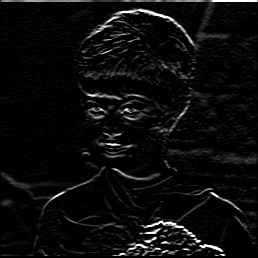

In [8]:
prewitt = np.array([[-1,-1,-1],
                           [0,0,0],
                           [1,1,1]])
cv2_imshow(convolution2d(img_gray, prewitt,1,2))

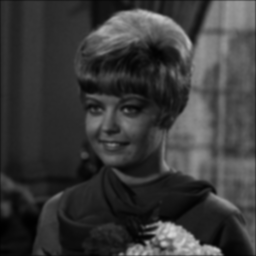

In [9]:
gaussian_blur_5x5 = np.array([[1,4,6,4,1],
                         [4,16,24,16,4],
                         [6,24,36,24,6],
                         [4,16,24,16,4],
                         [1,4,6,4,1]]) / 256
cv2_imshow(convolution2d(img_gray, gaussian_blur_5x5,1,2))

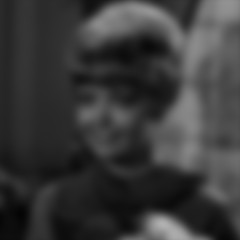

In [10]:
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution2d(img_gray, gauss_kernel,1,2))

<h2>TUGAS<h2>

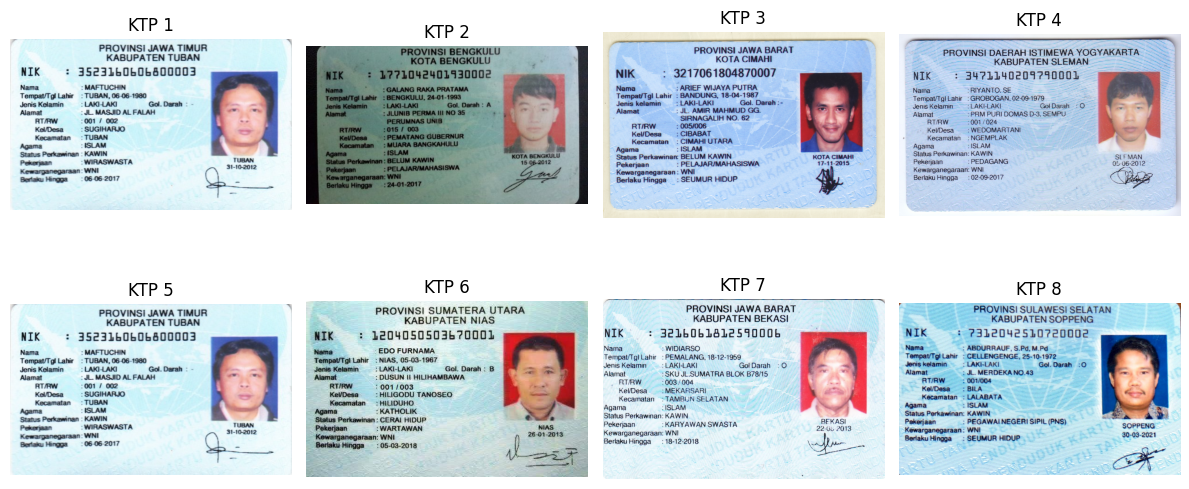

In [11]:
import glob

ktp = []

for img in glob.glob('/content/drive/MyDrive/Images/ktp/*'):
  n= cv.imread(img)
  ktp.append(n)

# Create a figure and two rows with 4 columns of subplots
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

# Loop through the photos and subplots, and display each photo
for i, ax in enumerate(axes):
    ax.imshow(cv.cvtColor(ktp[i], cv.COLOR_BGR2RGB))
    ax.set_title(f'KTP {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

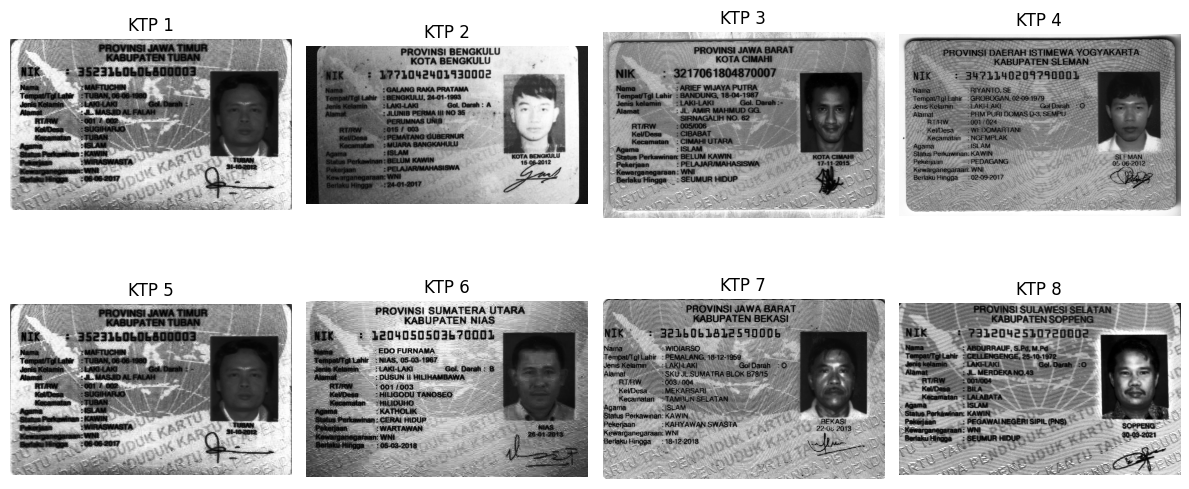

In [12]:
# Histogram Equalization
equalize_ktp = []

for img in ktp:
  gray_ktp = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  equalized_img = cv.equalizeHist(gray_ktp)
  equalize_ktp.append(equalized_img)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(equalize_ktp[i], cmap='gray')
    ax.set_title(f'KTP {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

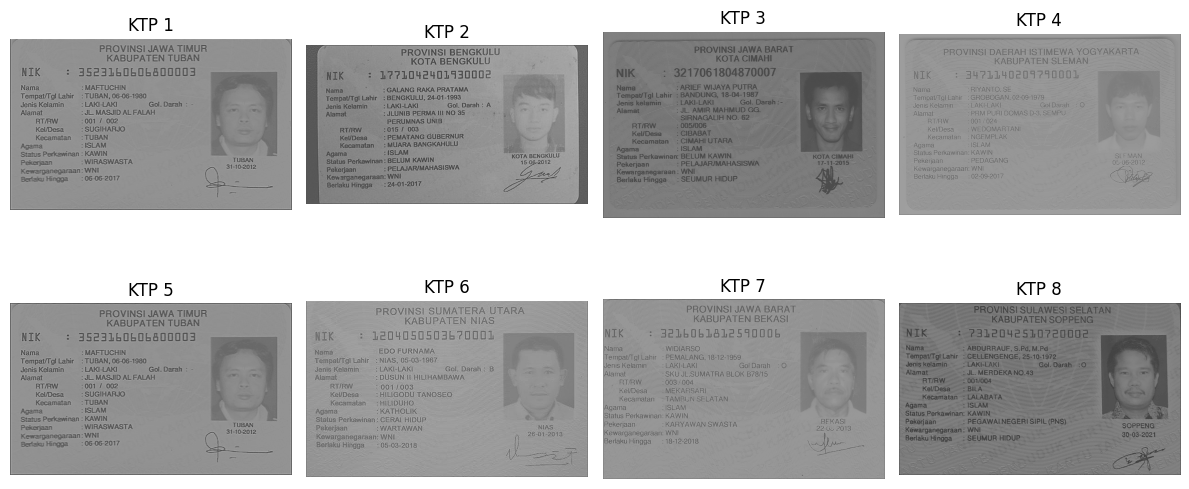

In [15]:
# Convolution kernel sharpen
sharpen_ktp = []

for img in ktp:
  img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
  convolution = convolution2d(img_gray,sharpen,1,2)
  sharpen_ktp.append(convolution)

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.flatten()

for i, ax in enumerate(axes):
    ax.imshow(sharpen_ktp[i], cmap='gray')
    ax.set_title(f'KTP {i + 1}')
    ax.axis('off')

plt.tight_layout()
plt.show()